<a href="https://colab.research.google.com/github/kaush997/BigMartSales/blob/main/BigMartSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8
To: /content/sales_prediction.csv
100% 870k/870k [00:00<00:00, 45.4MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('sales_prediction.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
x = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

SEED=42

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=SEED)

x_train.shape, x_test.shape

((5966, 11), (2557, 11))

In [ ]:
x_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
y_train.head(3)

,Item_Outlet_Sales
1921,117.8466
655,1230.3984
2229,4933.5780


In [ ]:
# make data to do explorations \ modifications

x_train_c = x_train.copy()

In [ ]:
x_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [ ]:
x_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1023
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1690
Outlet_Location_Type,0


In [ ]:
num_data = x_train_c.select_dtypes(exclude=['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [ ]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [ ]:
num_data.isnull().sum()

,0
Item_Weight,1023
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

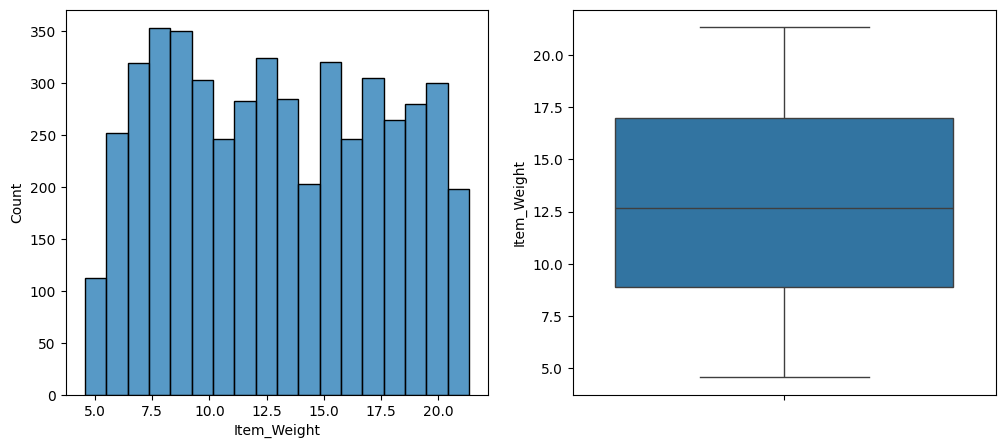

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=x_train_c, x='Item_Weight', ax=ax[0]);
sns.boxplot(data=x_train_c, y='Item_Weight', ax=ax[1]);

In [ ]:
def visualize_numeric_feature(data_frame, col_name):
  fig, ax = plt.subplots(1, 2, figsize=(12, 5))
  sns.histplot(data=data_frame, x=col_name, ax=ax[0]);
  sns.boxplot(data=x_train_c, y=col_name, ax=ax[1]);

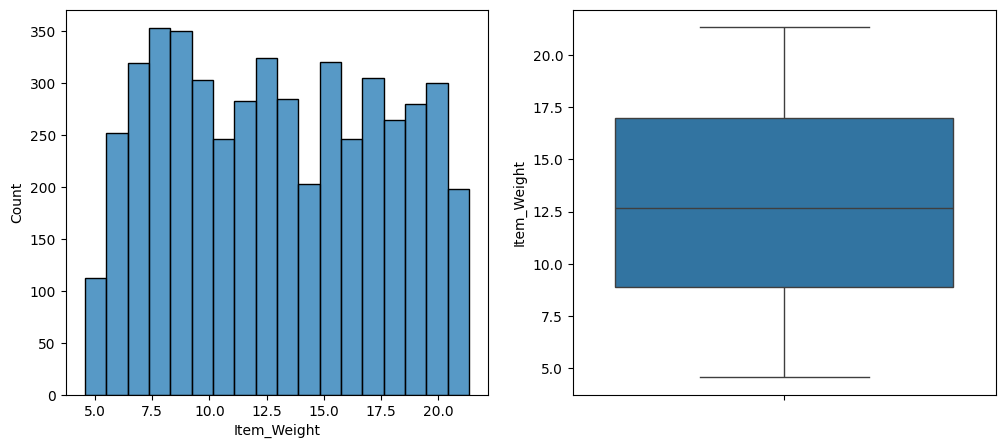

In [ ]:
visualize_numeric_feature(x_train_c, 'Item_Weight')

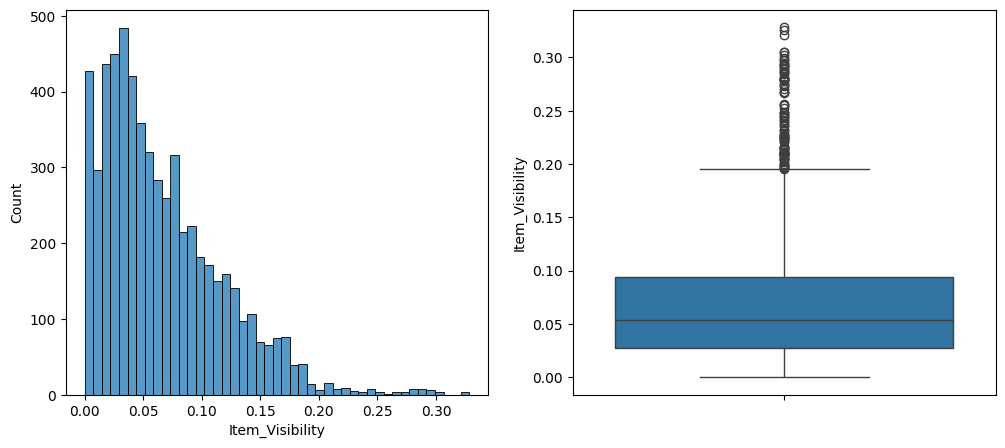

In [ ]:
visualize_numeric_feature(x_train_c, 'Item_Visibility')

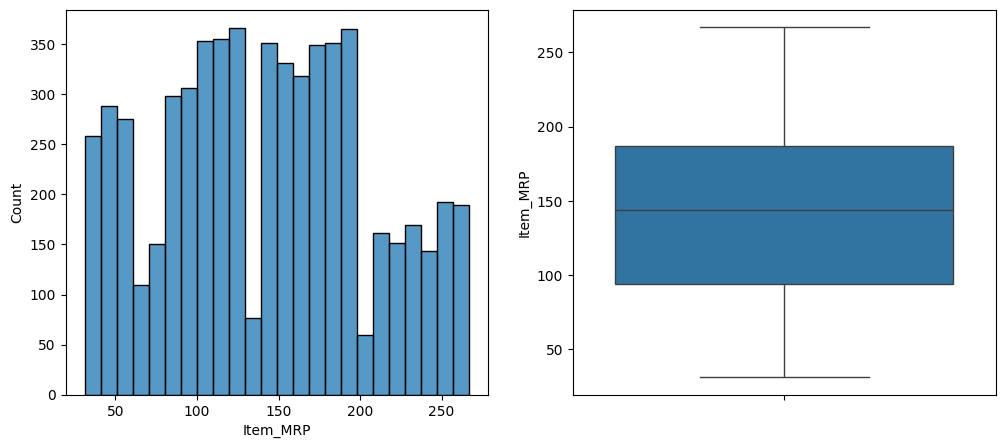

In [ ]:
visualize_numeric_feature(x_train_c, 'Item_MRP')

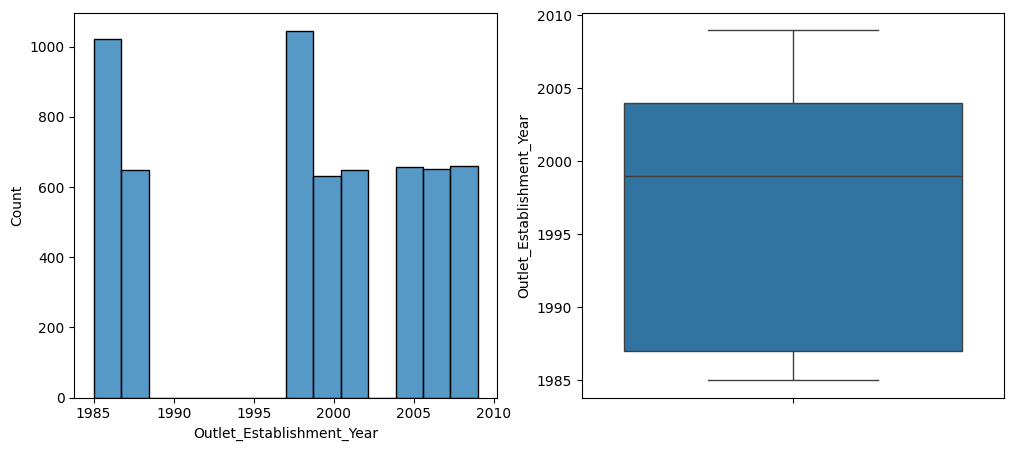

In [ ]:
visualize_numeric_feature(x_train_c, 'Outlet_Establishment_Year')

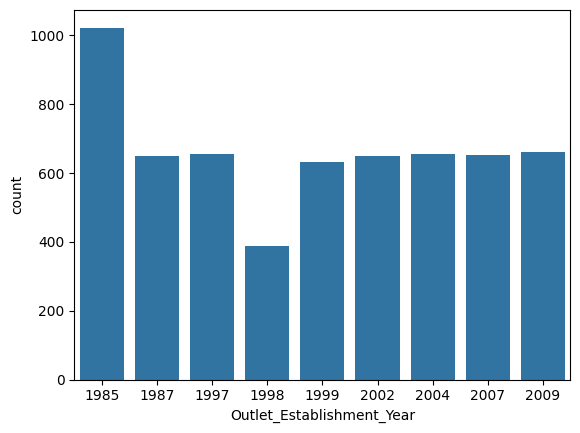

In [ ]:
sns.countplot(data=x_train_c, x='Outlet_Establishment_Year');

In [ ]:
cat_features = x_train_c.select_dtypes(include=['object'])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,FDF52,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [ ]:
cat_features.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,1690
Outlet_Location_Type,0
Outlet_Type,0


In [ ]:
cat_features['Item_Identifier'].value_counts()

,count
Item_Identifier,
FDF52,9
NCI54,9
FDN56,8
DRE49,8
FDV60,8
...,...
FDR16,1
FDY19,1
FDV27,1


In [ ]:
cat_features['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3535
Regular,2027
LF,243
low fat,82
reg,79


In [ ]:
cat_features['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,905
Snack Foods,835
Household,648
Frozen Foods,591
Dairy,474
Canned,450
Baking Goods,438
Health and Hygiene,365
Soft Drinks,305


In [ ]:
cat_features['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,668
OUT018,661
OUT035,656
OUT046,656
OUT017,652
OUT013,649
OUT045,649
OUT049,631
OUT010,389


In [ ]:
cat_features['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,1960
Small,1667
High,649


In [ ]:
cat_features['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,2367
Tier 2,1957
Tier 1,1642


In [ ]:
cat_features['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,3893
Grocery Store,744
Supermarket Type3,668
Supermarket Type2,661


**Data Wrangling + Feature Engineering**

**Step1: Create High Level Item Types**

In [ ]:
x_train_c['Item_Identifier'].apply(lambda x: x[:2]).value_counts()

,count
Item_Identifier,
FD,4269
NC,1137
DR,560


In [ ]:
x_train_c['Item_Identifier'].apply(lambda x: x[:2]).value_counts

<bound method IndexOpsMixin.value_counts of 1921    FD
655     NC
2229    FD
2537    FD
3528    FD
        ..
5734    FD
5191    FD
5390    NC
860     FD
7270    NC
Name: Item_Identifier, Length: 5966, dtype: object>